In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from Deepfunction import *
plt.style.use(['seaborn-whitegrid'])


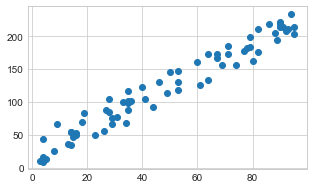

In [2]:
#시드 고정
seed = 97
np.random.seed(seed)

#Data preprocessing
x = np.float64(np.random.randint(0,100,100))
bias = np.float64(np.random.randint(0,50,100))
y = 2 * x + bias
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = seed)

#Graph
fig = plt.figure(figsize=(5,3))
plt.scatter(x_train ,y_train)
plt.show()

In [3]:
class Linear:
    """Linear Regression class"""
    
    def __init__(self):
        """Constructor"""
        self.w0 = 1.0
        self.b0 = 1.0
    
    def forward(self, x0):
        """Forward propagation"""
        h0 = self.w0 * x0 + self.b0
        return h0
    
    def backprop(self, x0, y0, h0, m, alpha): #loss function : SE
        """Back propagation"""
        err = h0 - y0
        self.w0 = self.w0 - (alpha * err * x0) / m
        self.b0 = self.b0 - (alpha * err) / m
        w0 = self.w0
        b0 = self.b0
        #print(w0, b0)
        return w0, b0
        
    def fit(self, x, y, alpha=0.01, epoch=50):
        """Model fitting"""
        m = len(x)
        for i in range(epoch): #epoch
            for x0, y0 in zip(x, y):
                h0 = self.forward(x0)
                w, b = self.backprop(x0, y0, h0, m, alpha)
        return w, b
    
    def score(self, x_test, y_test): #cost function : RMSE
        """Model assessment"""
        score = 0
        m = len(x_test)
        
        for x0, y0 in zip(x_test, y_test):
            h = self.w0 * x0 + self.b0
            j = np.sqrt((h - y0)**2) / m
            score = score + j
            
        return score
    
class Logistic:
    """Logistic Regression class"""
    
    def __init__(self):
        """Constructor"""
        self.w0 = 1.0
        self.b0 = 1.0
        
    def forward(self, x0):
        """Forward propagation"""
        h0 = self.w0 * x0 + self.b0
        return sigmoid(h0)
    
    def backprop(self, x0, y0, h0, m, alpha): #loss function : Logistic loss 
        """Back propagation"""
        err = h0 - y0
        self.w0 = self.w0 - (alpha * err * x0) / m
        self.b0 = self.b0 - (alpha * err) / m
        w0 = self.w0
        b0 = self.b0
        #print(w0, b0)
        return w0, b0
    
    def fit(self, x, y, alpha=0.01, epochs=100):
        """Model fitting"""
        m = len(x)
        for i in range(epochs): #epoch
            for x0, y0 in zip(x, y):
                h0 = self.forward(x0)
                w, b = self.backprop(x0, y0, h0, m, alpha)
        return w, b
    
    def predict(self, x):
        """Predict"""
        a_out = sigmoid(self.w0*x + self.b0)
        return a_out > 0.5
    
    def score(self, x_test, y_test): #cost function : proportion
        """Model assessment"""
        score = []
        for x0, y0 in zip(x_test, y_test):
            score.append(self.predict(x_test) == y_test)
            
        return np.mean(score)

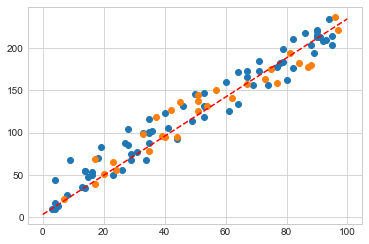

model RMSE : 12.026639578750865
weight : 2.31, bias : 3.18


In [4]:
#Training
model = Linear()
w, b = model.fit(x_train,y_train,alpha = 0.01)

#Graph
x_graph = np.arange(0,100,0.1)
fig = plt.figure()
plt.scatter(x_train ,y_train)
plt.scatter(x_test, y_test)
plt.plot(x_graph, w*x_graph + b, '--r')
plt.show()

#assessment
print(f"model RMSE : {model.score(x_test, y_test)}")
print("weight : %.2f, bias : %.2f" % (model.w0, model.b0))

0.8666666666666667


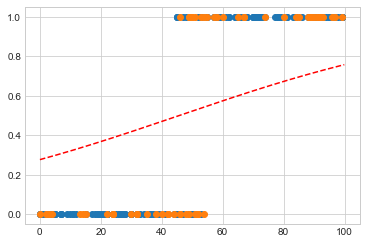

0.8333333333333334


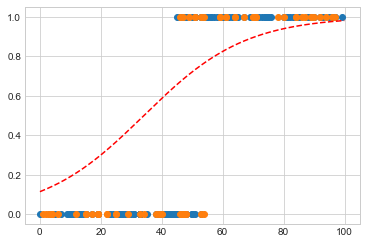

0.85


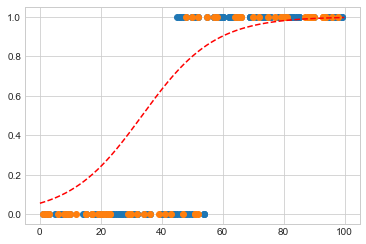

In [7]:
import time
model2 = Logistic()
for i in range(3):
    x0 = np.random.randint(0,55,100)
    y0 = np.zeros(100)
    x1 = np.random.randint(45,100,100)
    y1 = np.ones(100)

    x_data = np.array(list(x0) + list(x1))
    y_data = np.array(list(y0) + list(y1))

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, stratify = y_data, test_size = 0.3, random_state = 97)
    w, b = model2.fit(x_train, y_train, alpha = 0.1)
    #print(x_test)
    #print(model2.predict(x_test))
    print(model2.score(x_test, y_test))
    #print(w,b)
    fig = plt.figure()
    x_graph = np.arange(0, 100, 0.1)
    plt.scatter(x_train, y_train)
    plt.scatter(x_test, y_test)
    plt.plot(x_graph, sigmoid(w*x_graph + b), '--r')
    plt.show()
    time.sleep(2)